In [2]:
from matplotlib import pyplot as plt
import numpy as np
from random import choice
import time
from IPython.display import clear_output
from time import sleep 
import math
import pandas as pd
%matplotlib inline

## Draw initial plot

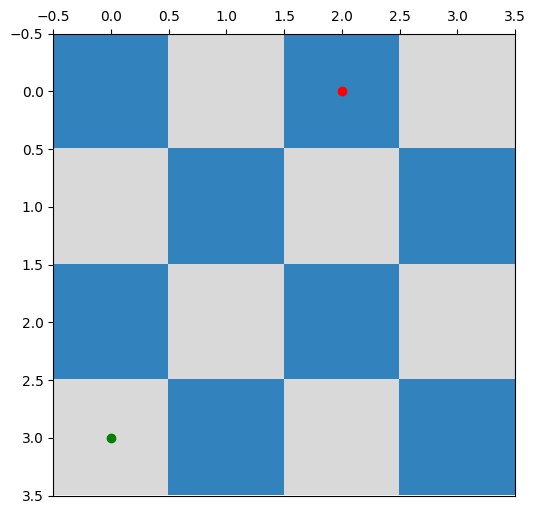

In [3]:
x = range(4)
y = range(4)
h,v = np.meshgrid(x,y)  #rect grid with vector coordinates (X,Y)
#min_max = np.min(x), np.max(x), np.min(y), np.max(y) 
res = np.add.outer(range(4), range(4))%2  # returns product of two vectors
positions=np.vstack([h.ravel(), v.ravel()]).T
start_position = choice(positions)
target_position = choice(positions)
possible_moves = [-1, 0, 1]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()

def draw_board():
    ax = plt.gca()
    ax.cla()
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    start_dot = ax.scatter(start_position[0],start_position[1],color="r")
    target_dot = ax.scatter(target_position[0],target_position[1],color="g")
    plt.imshow(res, cmap="tab20c")

if not np.array_equal(start_position,target_position):
    draw_board()


## Build Table

In [5]:
# testlist = [[0, 0], [1, 0], [0, 0], [1, 0], [1, 1], [1, 2], [0, 2], [0, 1], [0, 2], [0, 1], [0, 2], [0, 1], [1, 1], [2, 1], [2, 0]]
def build_table(route):
    route = [
        tuple(x) for x in route
    ]  # converts list into immutable list like [(1,3),(1,2)]
    route = route[::-1]  # reverses the list to go the route backwards
    vals = [(route[0], 1)]  # adds target position to list
    multipliedrewards_list = dict.fromkeys(route)
    route.pop(0)  # deletes target position from ttlist otherwise it would be a duplicate
    q = 1
    reward = 0.9
    # create list with positions + rewarded values
    for x in route:
        vals.append([x, math.pow(reward, q)])
        q += 1

    # creates table with final reward values
    # add value to table if not exist, otherwise multiply with existing value
    pd.options.display.float_format = "{:,.5g}".format
    df = pd.DataFrame(columns=[0, 1, 2, 3], index=[0, 1, 2, 3])
    for x in vals:
        mrl_temp = multipliedrewards_list.get(x[0])
        if not mrl_temp:
            multipliedrewards_list[x[0]] = x[1]
        else:
            multipliedrewards_list[x[0]] = x[1] * mrl_temp
    for x in multipliedrewards_list:
        df.at[x[0], x[1]] = multipliedrewards_list.get(x)

    return multipliedrewards_list, df.transpose(copy=True)  # swap axis so they match the meshgrid with x and y values


## Explore

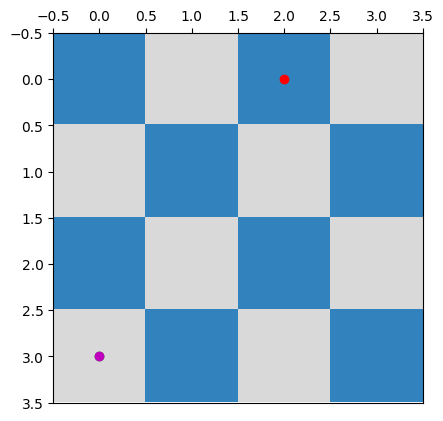

Target reached!
Total Steps: 17
Route: [(2, 0), [2, 1], [3, 1], [3, 2], [3, 3], [2, 3], [1, 3], [1, 2], [1, 3], [2, 3], [2, 2], [2, 3], [1, 3], [0, 3]]


,0,1,2,3
0,NaN,NaN,0.25419,NaN
1,NaN,NaN,0.28243,0.31381
2,NaN,0.53144,0.729,0.34868
3,1,0.25419,0.22877,0.38742


In [6]:
route = []
stepcounter = 0
route.append((start_position[0], start_position[1]))
newposx, newposy = 0, 0
# testlist = [[0, 0], [1, 0], [0, 0], [1, 0], [1, 1], [1, 2], [0, 2], [0, 1], [0, 2], [0, 1], [0, 2], [0, 1], [1, 1], [2, 1], [2, 0]]
SLEEP = 0.05
while True:
    clear_output(True)
    movex = choice(possible_moves)
    movey = choice(possible_moves)
    last_pos = route[-1]
    draw_board()
    sleep(SLEEP)
    if not movex == movey:
        if movex == 0 or movey == 0:
            newposx = last_pos[0] + movex
            newposy = last_pos[1] + movey
            ax = plt.gca()
            if newposx >= 0 and newposx <= 3 and newposy >= 0 and newposy <= 3:
                # print(f"New pos: {newposx, newposy}")
                route.append([newposx, newposy])
                ax.scatter(newposx, newposy, color="m")
                plt.show()
            if newposx == target_position[0] and newposy == target_position[1]:
                print("Target reached!")
                plt.show()
                break
            stepcounter += 1

print(f"Total Steps: {stepcounter}")
print(f"Route: {route}",sep="\n")

rewardslist, df = build_table(route)
df

In [8]:
## Print out rewards for each position
for key, value in rewardslist.items():
    print(key, value)

(0, 3) 1
(1, 3) 0.2541865828329001
(2, 3) 0.22876792454961006
(2, 2) 0.7290000000000001
(1, 2) 0.531441
(3, 3) 0.3874204890000001
(3, 2) 0.3486784401000001
(3, 1) 0.31381059609000006
(2, 1) 0.2824295364810001
(2, 0) 0.2541865828329001


In [38]:
x = [np.nan, 0.5,2,0.1,0,0.1,0.1]

u= np.unique(x)
u = u[np.isfinite(u)]
print(u[-2])
# dup = u[c > 1]
# print(dup)


0.5


In [37]:
nn = [-1, 1]
def get_next_field_vals(xpos, ypos) -> np.ndarray:
    nghb_values = []
    for n in nn:
        newposx = xpos + n  # xpos = startposition[0]
        if newposx >= 0 and newposx <= 3:
            nghb_values.append(df[xpos + n][ypos])
        newposy = ypos + n
        if newposy >= 0 and newposy <= 3:
            nghb_values.append(df[xpos][ypos + n])
    print(f"Neighbour values: {nghb_values}")
    u = np.unique(nghb_values)
    u = u[np.isfinite(u)]
    return u

def get_max_field(max_value):
    #print(f"Max: {max_value}")
    for key, value in rewardslist.items():
        if value == max_value:
            print("field of max value:")
            print(f"Value: {value}")
            return key[0], key[1]

## Exploit
Er soll alle felder drumherum checken und dann den nächst höheren nehmen 
danach: wenn die felder einen bestimmten Treshhold nicht überschreiten, nimm random.


[(2, 0), (2, 1), (2, 2), (1, 2), (1, 3)]
lastPOS: (1, 3)
Neighbour values: [1, 0.531441, 0.22876792454961006]
nextfields: [0.22876792 0.531441   1.        ]
field of max value:
Value: 1
Target reached!


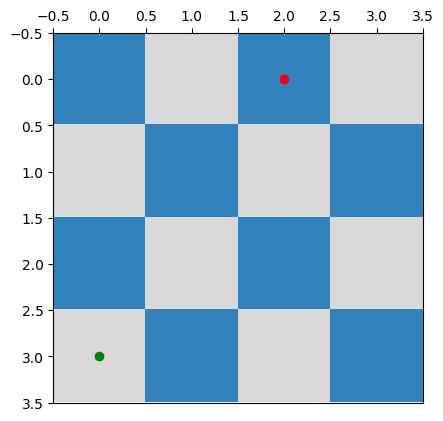

Total Steps: 4
Route: [(2, 0), (2, 1), (2, 2), (1, 2), (1, 3)]


In [40]:
# test get max value from anliegenden feldern
# print(multipliedrewards_list)
# print(df.at[start_position[0], start_position[1]])
# print(df.iloc[start_position[0]][start_position[1]])

route = []
stepcounter = 0
SLEEP = 5
route.append((start_position[0], start_position[1]))

while True:
    clear_output(True)
    print(route)
    last_pos = route[-1]
    print(f"lastPOS: {last_pos}")
    next_field_vals = get_next_field_vals(last_pos[0],last_pos[1])
    print(f"nextfields: {next_field_vals}")
    newpos =  get_max_field(next_field_vals[-1])# best next field with highest value
    sleep(SLEEP)
    draw_board()
    ax = plt.gca()
    if newpos[0] == target_position[0] and newpos[1] == target_position[1]:
        print("Target reached!")
        plt.show()
        break
    if newpos in route:
        print("next biggest value")
        newpos =  get_max_field(next_field_vals[-2])# best next field with highest value
    print(f"new pos: {newpos}")
    route.append((newpos[0], newpos[1]))
    ax.scatter(newpos[0], newpos[1], color="m")
    plt.show()
    stepcounter += 1

print(f"Total Steps: {stepcounter}")
print(f"Route: {route}", sep="\n")  

